In [1]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('~/Documents/GitHub/LTY-Spectral-Classification/data files/model_results.csv')

In [4]:
df.sort_values(by="rmse")

,model,dataset,rmse,r2,within_1,within_2
7,XGB Regressor,3-band,0.957075,0.872722,0.933131,0.981763
8,Tuned XGB Regressor,2-band,1.769284,0.925598,0.697761,0.858209
4,MLP Regressor,2-band,1.876388,0.916318,0.649254,0.839552
6,XGB Regressor,2-band,1.927805,0.911669,0.682836,0.854478
2,Random Forest,2-band,2.127000,0.892472,0.679104,0.845149
3,Random Forest,3-band,2.127000,0.884929,0.759878,0.933131
5,MLP Regressor,3-band,2.156734,0.788461,0.659574,0.860182
0,Linear Regressor,2-band,2.197179,0.727289,0.538710,0.787097
1,Linear Regressor,3-band,2.197179,0.727289,0.538710,0.787097


In [5]:
sns.set(style="whitegrid", context="talk")


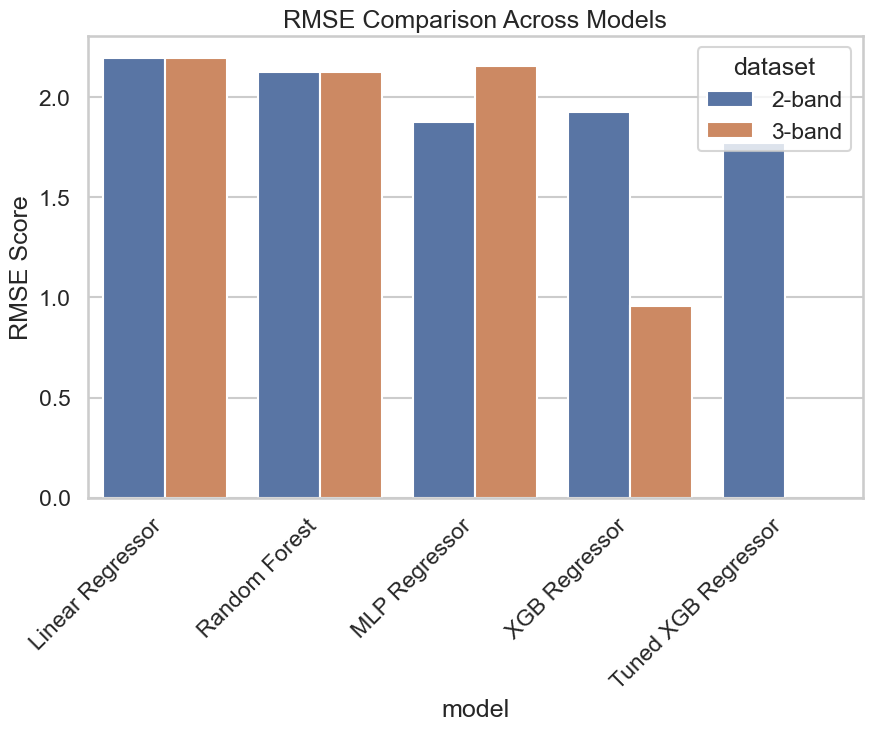

In [21]:
#create bar graph comparing models and their rmse values
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="model", y="rmse", hue="dataset")
plt.xticks(rotation=45, ha='right')
plt.title("RMSE Comparison Across Models")
plt.ylabel("RMSE Score")
plt.show()


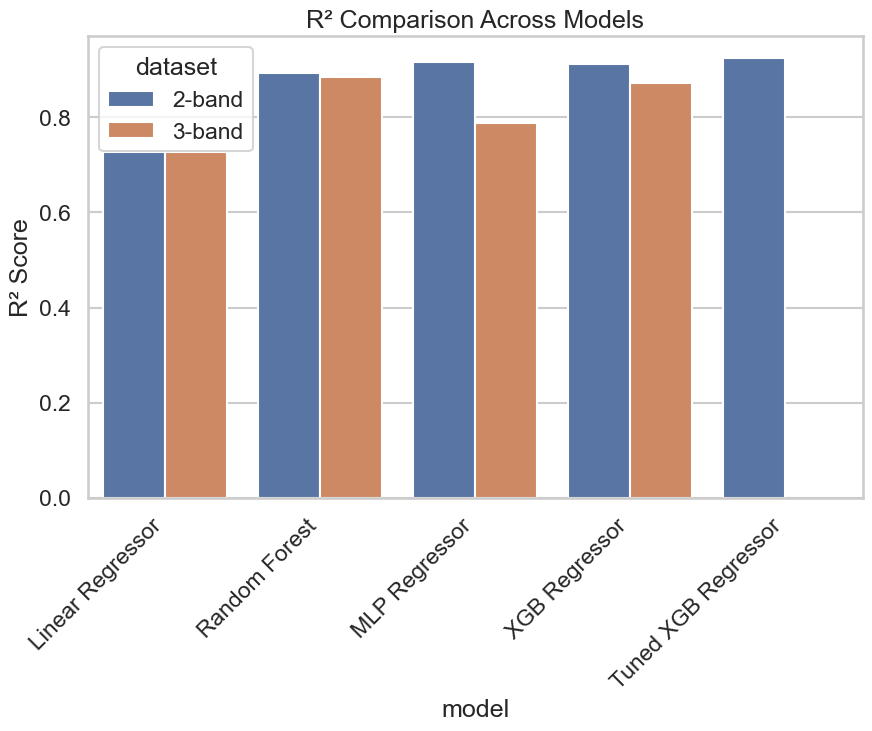

In [22]:
#create bar graph comparing models and their r2 values
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="model", y="r2", hue="dataset")
plt.xticks(rotation=45, ha='right')
plt.title("R² Comparison Across Models")
plt.ylabel("R² Score")
plt.show()


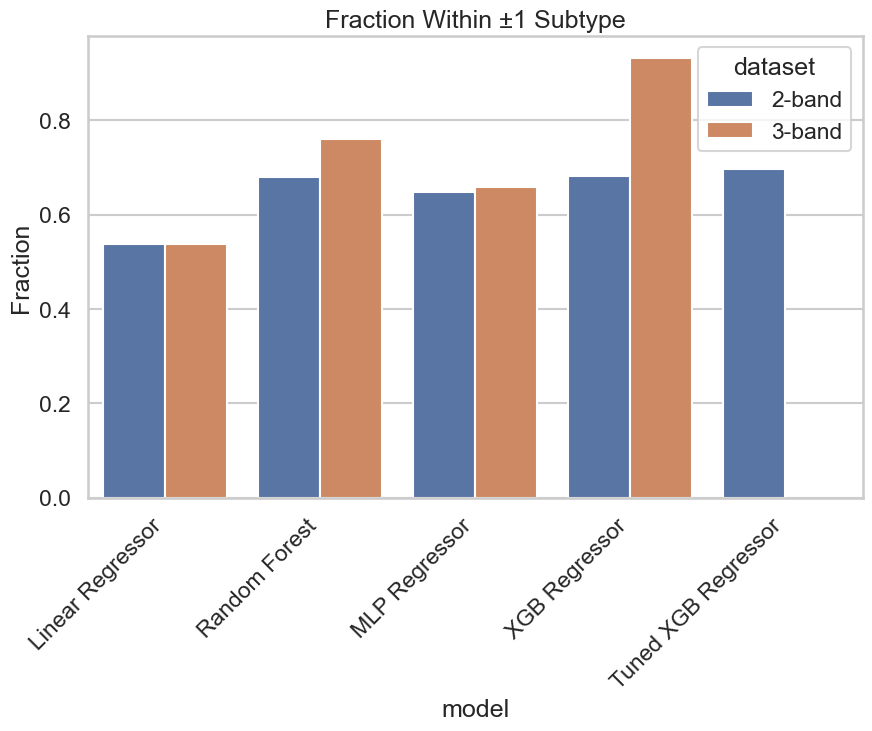

In [23]:
#create bar graph comparing models and their within 1 subtype values
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="model", y="within_1", hue="dataset")
plt.xticks(rotation=45, ha='right')
plt.title("Fraction Within ±1 Subtype")
plt.ylabel("Fraction")
plt.show()


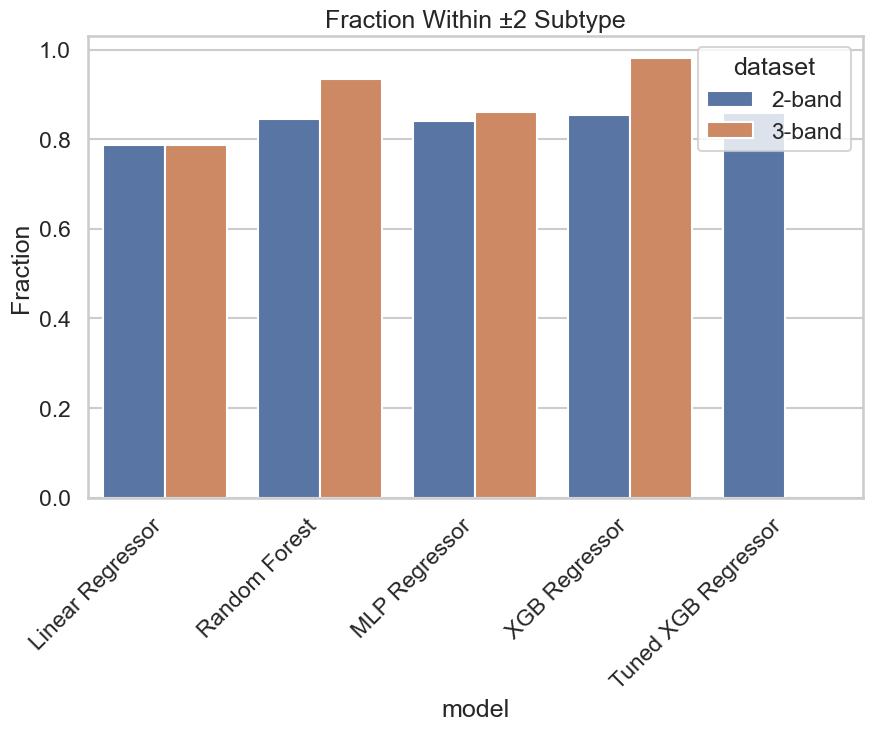

In [24]:
#create bar graph comparing models and their within 2 subtype values
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="model", y="within_2", hue="dataset")
plt.xticks(rotation=45, ha='right')

plt.title("Fraction Within ±2 Subtype")
plt.ylabel("Fraction")
plt.show()

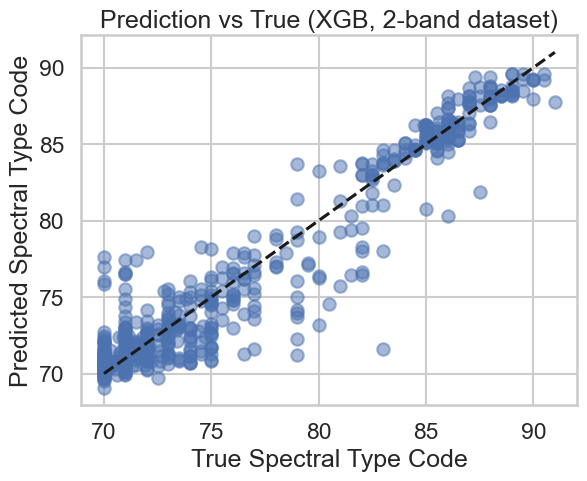

In [10]:
import model_training.model_imports as mi
import os

path = os.path.expanduser("~/Documents/GitHub/LTY-Spectral-Classification/model_training/y_pred_xgb_2band.npy")
y_pred = np.load(path)
plt.scatter(mi.y_test, y_pred, alpha=0.5)
plt.plot([mi.y_test.min(), mi.y_test.max()], [mi.y_test.min(), mi.y_test.max()], 'k--')
plt.xlabel("True Spectral Type Code")
plt.ylabel("Predicted Spectral Type Code")
plt.title("Prediction vs True (XGB, 2-band dataset)")
plt.show()


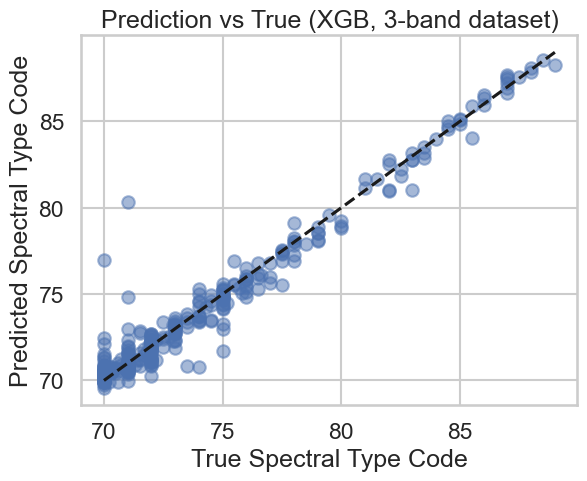

In [11]:
path = os.path.expanduser("~/Documents/GitHub/LTY-Spectral-Classification/model_training/y_pred_xgb_3band.npy")
y_pred_3band = np.load(path)
plt.scatter(mi.y_3bands_test, y_pred_3band, alpha=0.5)
plt.plot([mi.y_3bands_test.min(), mi.y_3bands_test.max()], [mi.y_3bands_test.min(), mi.y_3bands_test.max()], 'k--')
plt.xlabel("True Spectral Type Code")
plt.ylabel("Predicted Spectral Type Code")
plt.title("Prediction vs True (XGB, 3-band dataset)")
plt.show()


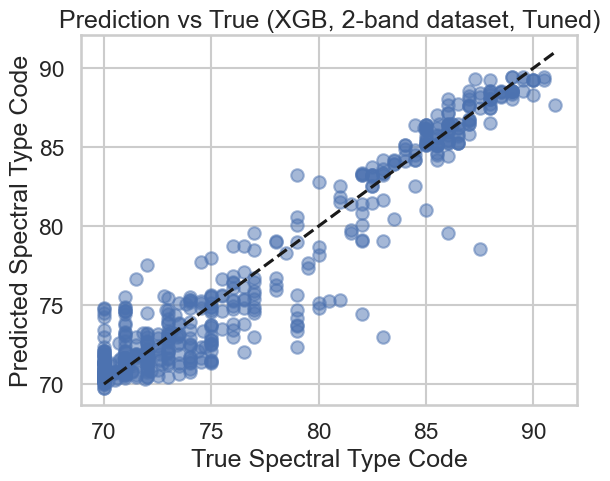

In [26]:
path = os.path.expanduser("~/Documents/GitHub/LTY-Spectral-Classification/model_training/y_pred_xgb_tuned.npy")
y_pred_tuned = np.load(path)
plt.scatter(mi.y_test, y_pred_tuned, alpha=0.5)
plt.plot([mi.y_test.min(), mi.y_test.max()], [mi.y_test.min(), mi.y_test.max()], 'k--')
plt.xlabel("True Spectral Type Code")
plt.ylabel("Predicted Spectral Type Code")
plt.title("Prediction vs True (XGB, 2-band dataset, Tuned)")
plt.show()


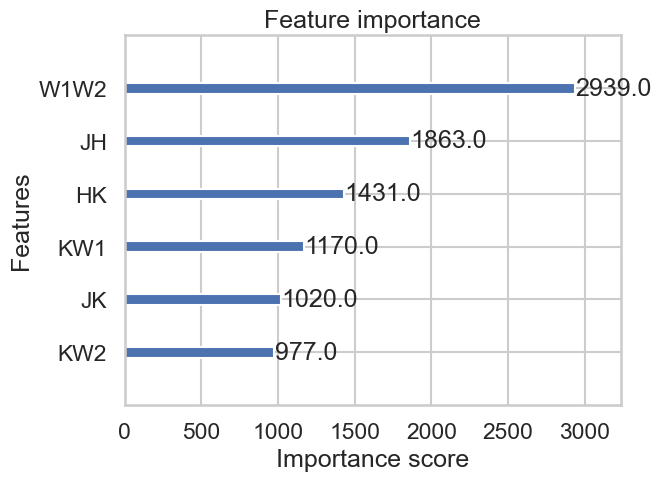

In [12]:
#feature importance for xgboost model
#2 band model
import matplotlib.pyplot as plt
import xgboost as xgb

path = os.path.expanduser("~/Documents/GitHub/LTY-Spectral-Classification/model_training/xgb_model_2band.npy")
xgb_model_2band = np.load(path, allow_pickle=True).item()
xgb.plot_importance(xgb_model_2band, max_num_features=10)
plt.show()

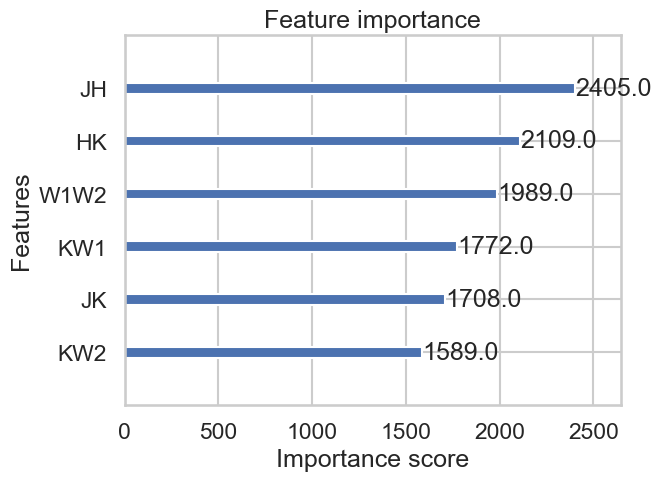

In [13]:
#3 band model 

path = os.path.expanduser("~/Documents/GitHub/LTY-Spectral-Classification/model_training/xgb_model_3band.npy")
xgb_model_3band = np.load(path, allow_pickle=True).item()
xgb.plot_importance(xgb_model_3band, max_num_features=10)
plt.show()

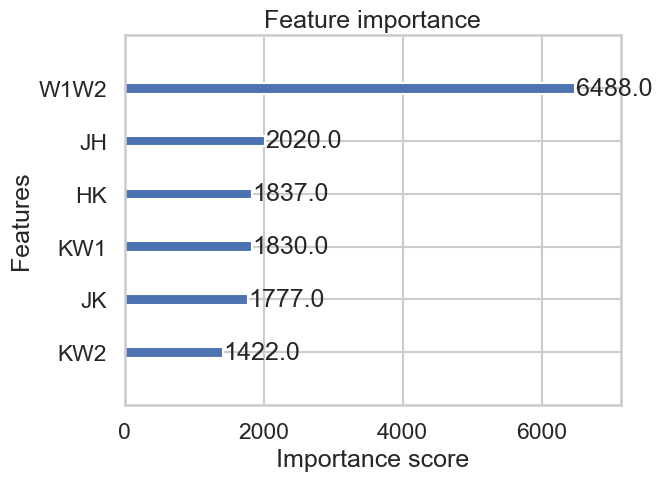

In [27]:
#tuned 2 band model 

path = os.path.expanduser("~/Documents/GitHub/LTY-Spectral-Classification/model_training/xgb_model_tuned.npy")
xgb_model_tuned = np.load(path, allow_pickle=True).item()
xgb.plot_importance(xgb_model_tuned, max_num_features=10)
plt.show()

In [14]:
def convert_spt_code_to_string(spectral_code, decimals=1):
    """
    Convert spectral type codes to string values

    Parameters
    ----------
    spectral_code : float
        A spectral type code

    decimals : int
        Number of decimal places to include in the spectral type string

    Returns
    -------
    spectral_type_string : str
        spectral type string
    """
    spt_type = ""

    # Identify major type
    if 60 <= spectral_code < 70:
        spt_type = "M"
    elif 70 <= spectral_code < 80:
        spt_type = "L"
    elif 80 <= spectral_code < 90:
        spt_type = "T"
    elif 90 <= spectral_code < 100:
        spt_type = "Y"

    # Numeric part of type
    format = f".{decimals}f"
    spt_type = f"{spt_type}{spectral_code% 10:{format}}"

    return spt_type

In [15]:
def major_class(code):
    if 70 <= code < 80:
        return "L"
    elif 80 <= code < 90:
        return "T"
    elif 90 <= code < 100:
        return "Y"
    else:
        return "?"


In [16]:
from sklearn.metrics import confusion_matrix

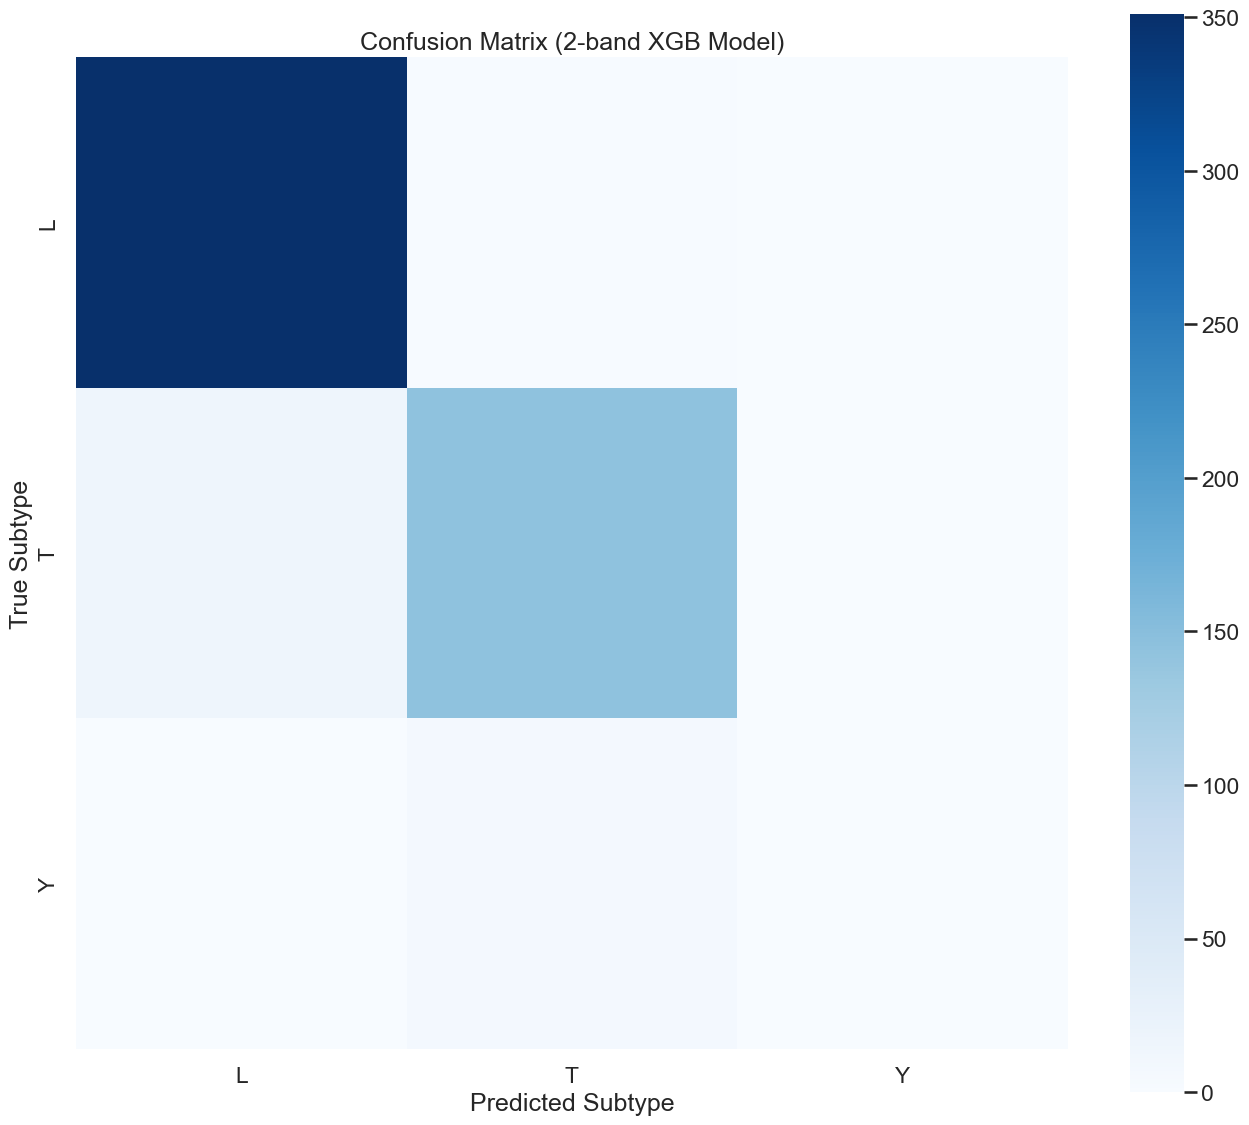

In [17]:
#errors 2 band model xgboost
y_pred_strings = [major_class(code) for code in y_pred]
y_test_strings = [major_class(code) for code in mi.y_test]

labels = sorted(set(y_test_strings))   # string spectral types
cm = confusion_matrix(y_test_strings, y_pred_strings, labels=labels)

plt.figure(figsize=(16,14))
sns.heatmap(cm, cmap="Blues", square=True,
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel("Predicted Subtype")
plt.ylabel("True Subtype")
plt.title("Confusion Matrix (2-band XGB Model)")
plt.show()


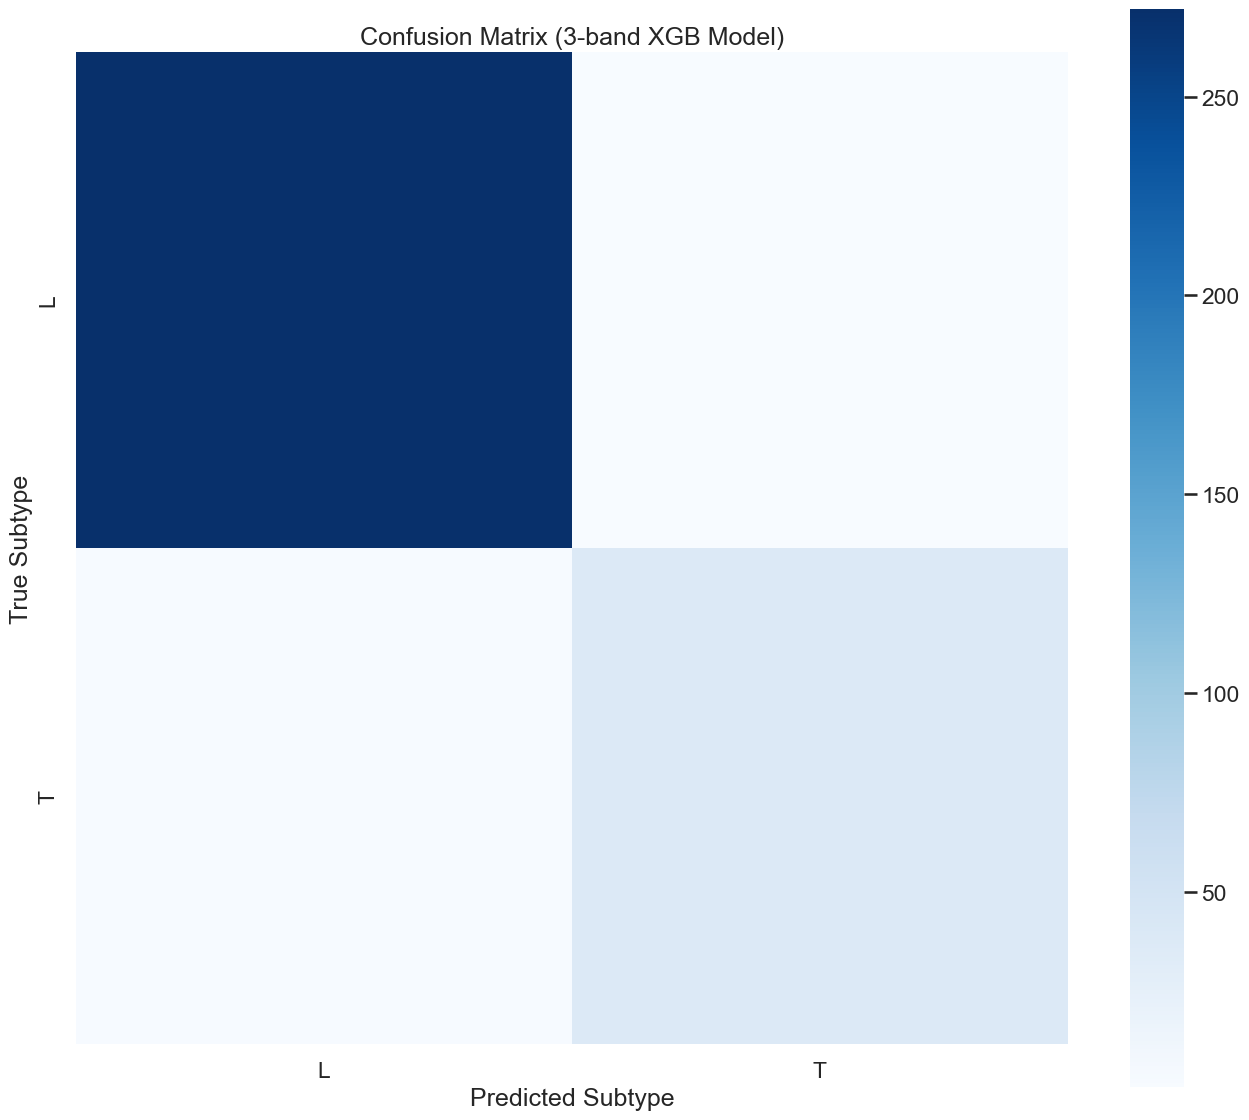

In [18]:
#errors 3 band model xgboost
y_pred_3band_strings = [major_class(code) for code in y_pred_3band]
y_test_3band_strings = [major_class(code) for code in mi.y_3bands_test]

labels = sorted(set(y_test_3band_strings))   # string spectral types
cm_3band = confusion_matrix(y_test_3band_strings, y_pred_3band_strings, labels=labels)

plt.figure(figsize=(16,14))
sns.heatmap(cm_3band, cmap="Blues", square=True,
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel("Predicted Subtype")
plt.ylabel("True Subtype")
plt.title("Confusion Matrix (3-band XGB Model)")
plt.show()


<Axes: >

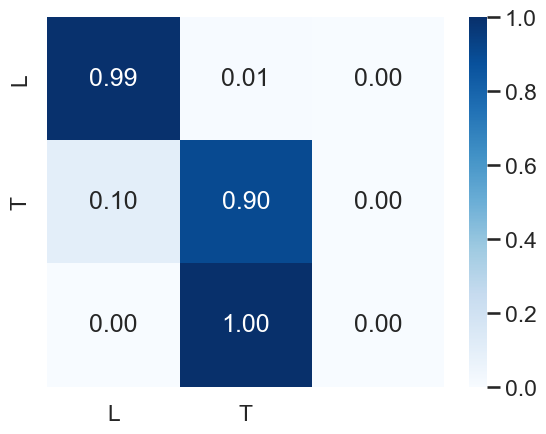

In [19]:
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_norm, annot=True, cmap="Blues",
            xticklabels=labels, yticklabels=labels,
            fmt=".2f")


<Axes: >

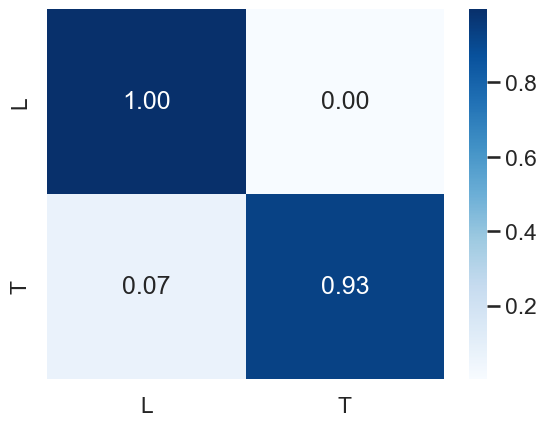

In [20]:
cm_norm_3band = cm_3band.astype("float") / cm_3band.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_norm_3band, annot=True, cmap="Blues",
            xticklabels=labels, yticklabels=labels,
            fmt=".2f")
